In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/california housing prices/housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna( inplace = True) # Drop missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19734,-122.17,40.20,28.0,1782.0,334.0,873.0,311.0,3.3594,INLAND,79100.0
9710,-121.66,36.67,40.0,2878.0,592.0,1444.0,564.0,3.1439,<1H OCEAN,192300.0
8030,-118.13,33.84,35.0,3008.0,674.0,1584.0,671.0,3.5465,<1H OCEAN,213200.0
19531,-120.98,37.64,40.0,1791.0,359.0,679.0,322.0,2.1458,INLAND,130300.0
15983,-122.47,37.76,52.0,2680.0,740.0,1587.0,713.0,2.5933,NEAR BAY,359600.0
...,...,...,...,...,...,...,...,...,...,...
16413,-121.18,37.96,35.0,411.0,74.0,193.0,59.0,2.5625,INLAND,146900.0
10759,-117.87,33.63,9.0,6163.0,1004.0,1912.0,903.0,10.8289,<1H OCEAN,500001.0
4288,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,<1H OCEAN,218800.0
16470,-121.26,38.12,27.0,1818.0,459.0,1182.0,428.0,1.8575,INLAND,73800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

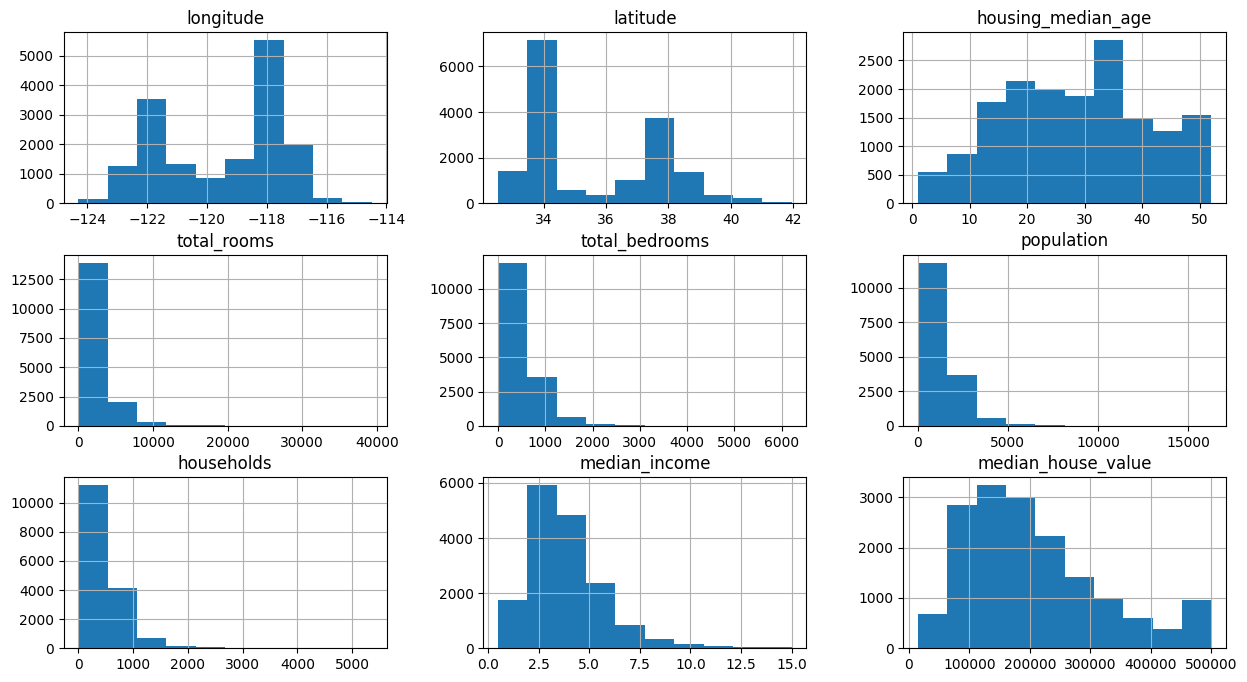

In [ ]:
train_data.hist( figsize =(15, 8))

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19734,-122.17,40.20,28.0,1782.0,334.0,873.0,311.0,3.3594,INLAND,79100.0
9710,-121.66,36.67,40.0,2878.0,592.0,1444.0,564.0,3.1439,<1H OCEAN,192300.0
8030,-118.13,33.84,35.0,3008.0,674.0,1584.0,671.0,3.5465,<1H OCEAN,213200.0
19531,-120.98,37.64,40.0,1791.0,359.0,679.0,322.0,2.1458,INLAND,130300.0
15983,-122.47,37.76,52.0,2680.0,740.0,1587.0,713.0,2.5933,NEAR BAY,359600.0
...,...,...,...,...,...,...,...,...,...,...
16413,-121.18,37.96,35.0,411.0,74.0,193.0,59.0,2.5625,INLAND,146900.0
10759,-117.87,33.63,9.0,6163.0,1004.0,1912.0,903.0,10.8289,<1H OCEAN,500001.0
4288,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,<1H OCEAN,218800.0
16470,-121.26,38.12,27.0,1818.0,459.0,1182.0,428.0,1.8575,INLAND,73800.0


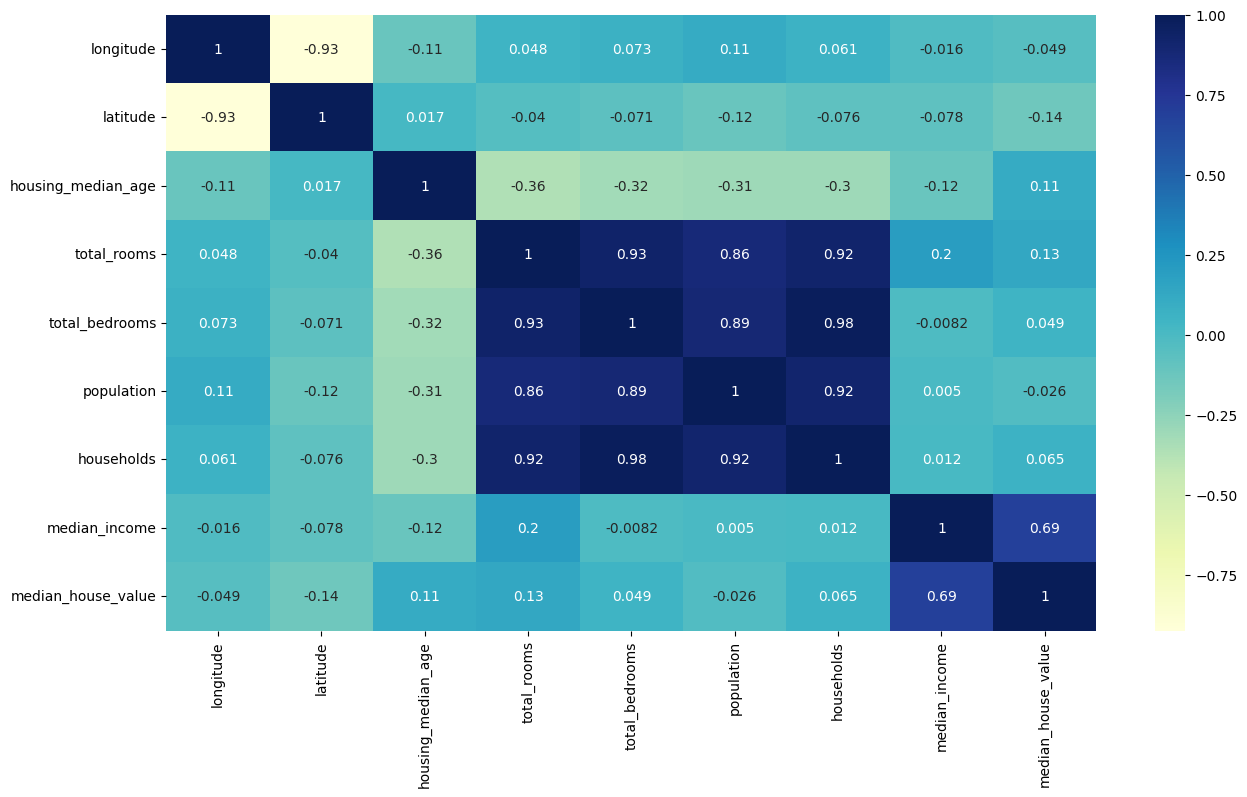

In [ ]:
# Remove the 'ocean_proximity' column
train_data_numeric = train_data.drop(columns=['ocean_proximity'])
plt.figure(figsize=(15, 8))
sns.heatmap(train_data_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Data preprocessing

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

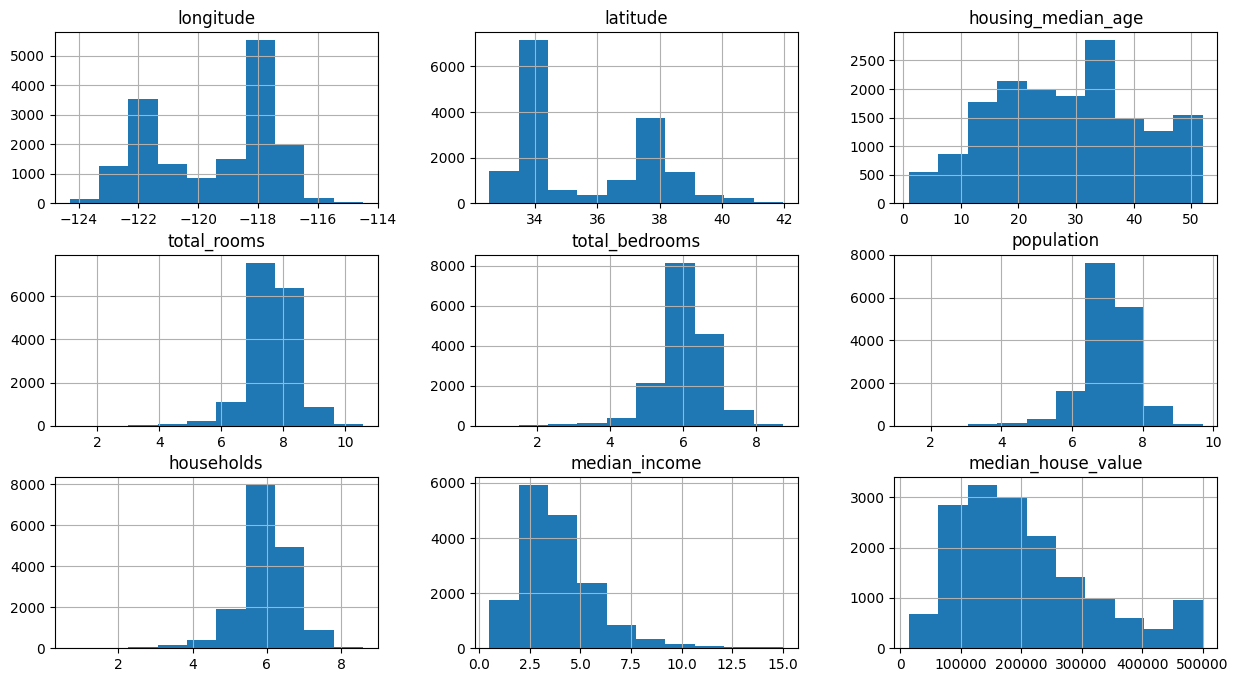

In [ ]:
train_data.hist( figsize = (15, 8))

In [ ]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,7208
INLAND,5155
NEAR OCEAN,2116
NEAR BAY,1864
ISLAND,3


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

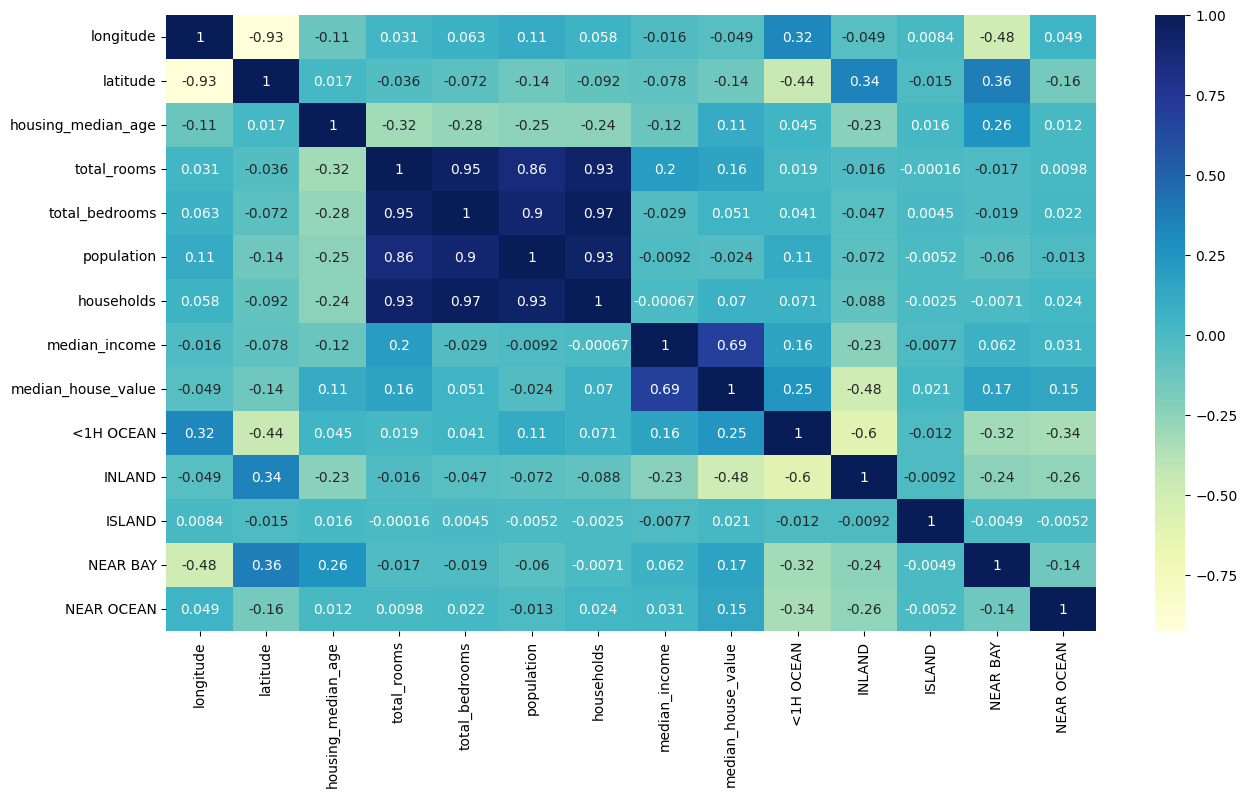

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

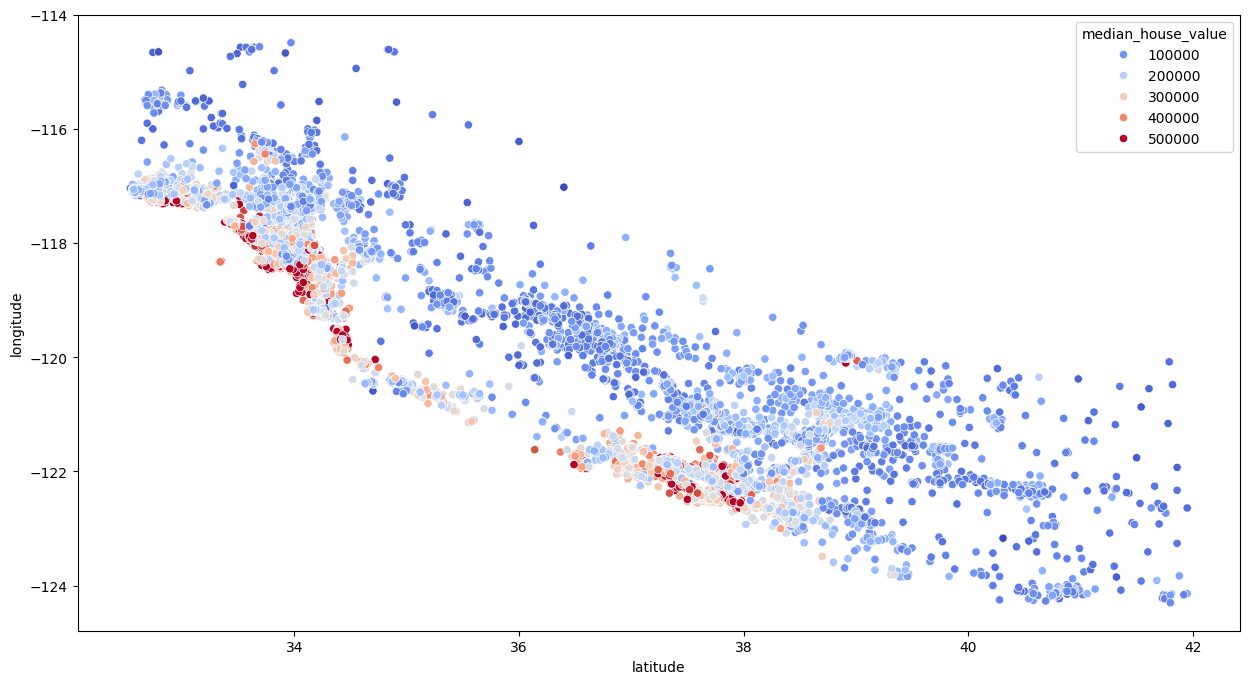

In [ ]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data, hue = 'median_house_value', palette = "coolwarm")

# Feature Engineering

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

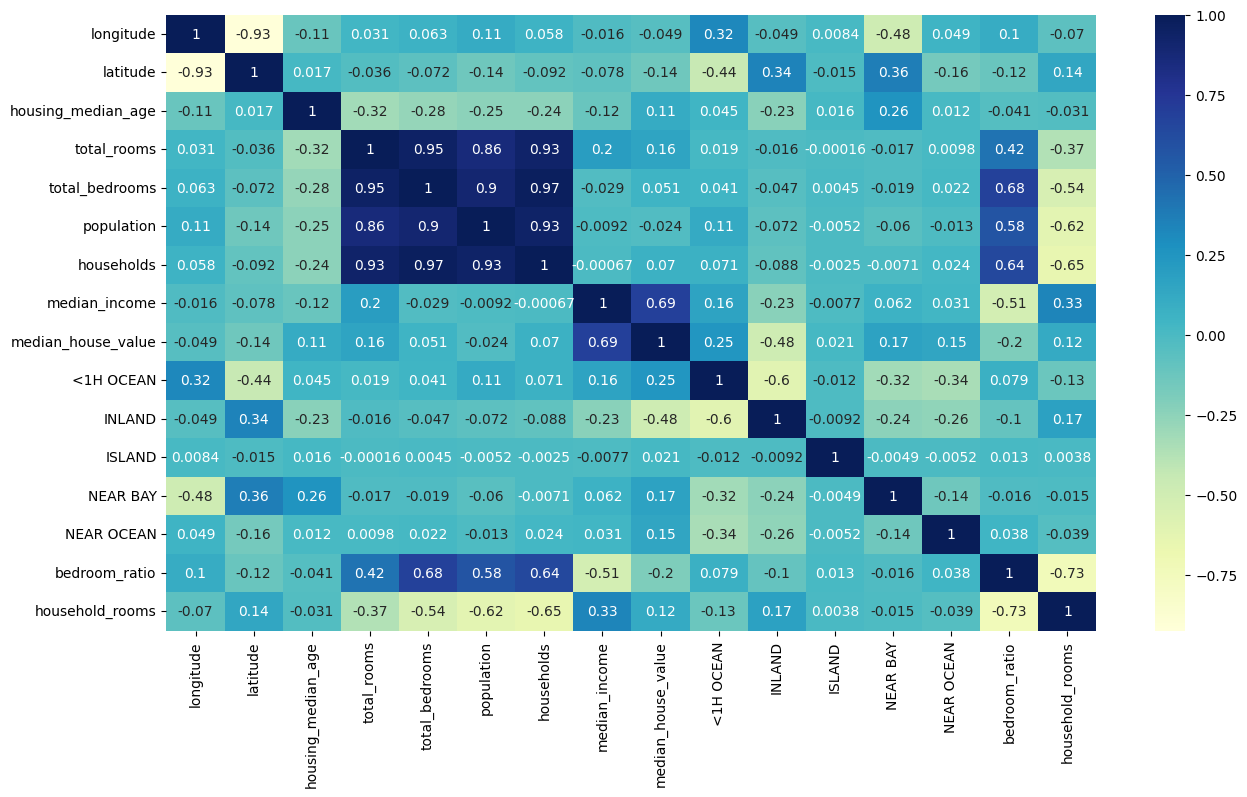

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

# Linear regession

In [ ]:
scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis= 1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] =test_data['total_rooms'] / test_data['households']



In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
reg.score(X_test_s,y_test)

0.6782431846205752

# Reinformcement learning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8138479284780633

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor()

# Define the parameter grid
param_grid = {
   "n_estimators":[3,10,30],
   "max_features":[2,4,6,8]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Fit the model
grid_search.fit(X_train_s, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Extract the best estimator
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)

0.8147840104013877